# <font color = "red">Project 2

## <font color = "blue"> Blue color is comment, <font color = 'Green'> Green color is conclusion

# Classification Part (Income classification)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#model
from sklearn.metrics import confusion_matrix, roc_auc_score,precision_score, recall_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


%matplotlib notebook
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.mode.chained_assignment = None
#Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
os.chdir("C:/Users/howar/Desktop/ML")

In [2]:
import numpy as np # linear algebra
from matplotlib import pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection # for splitting the data into training and testing data
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Description

Listing of attributes:

income:　>50K, <=50K.

age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

fnlwgt: final weight (continuous). 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: number of years (continuous). 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: work hour per weeks (continuous). 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
df = pd.read_csv('income.csv')

### <font color='blue'> We can see there are total 15 columns, 9 are categorical, 6 are numerical

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30224 entries, 0 to 30223
Data columns (total 15 columns):
age               27515 non-null float64
workclass         27511 non-null object
fnlwgt            27528 non-null float64
education         27537 non-null object
education-num     27498 non-null float64
marital-status    27517 non-null object
occupation        27546 non-null object
relationship      27450 non-null object
race              27460 non-null object
sex               27558 non-null object
capital-gain      27509 non-null float64
capital-loss      27489 non-null float64
hours-per-week    27493 non-null float64
native-country    27424 non-null object
income            27537 non-null object
dtypes: float64(6), object(9)
memory usage: 3.5+ MB


### <font color='blue'> Here are the columns with missing value

In [5]:
df.isnull().sum()

age               2709
workclass         2713
fnlwgt            2696
education         2687
education-num     2726
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain      2715
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

### <font color='blue'> Basic understanding of numerical variable

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,27515.000000,2.752800e+04,27498.000000,27509.000000,27489.000000,27493.000000
mean,38.423514,1.900021e+05,10.125755,1074.957396,88.416567,40.909613
std,13.135963,1.058218e+05,2.547417,7284.630489,404.352368,11.937212
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176150e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.377540e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,4356.000000,99.000000


## Dealing with missing value

### <font color='blue'> Use median to fill continuous variables missing data

In [7]:
df.fillna({'age':37}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt            2696
education         2687
education-num     2726
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain      2715
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [8]:
df.fillna({'fnlwgt':1.785755e+05}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num     2726
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain      2715
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [9]:
df.fillna({'education-num':10}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num        0
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain      2715
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [10]:
df.fillna({'capital-gain':0}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num        0
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain         0
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [11]:
df.fillna({'capital-loss':0}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num        0
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain         0
capital-loss         0
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [12]:
df.fillna({'hours-per-week':0}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num        0
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain         0
capital-loss         0
hours-per-week       0
native-country    2800
income            2687
dtype: int64

### <font color='blue'> Basic understanding of categorical variable

In [13]:
df.describe(include = 'O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,27511,27537,27517,27546,27450,27460,27558,27424,27537
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,20296,8983,12838,3690,11359,23580,18624,25001,20705


### <font color='blue'> Use mode to fill Na for categorical variable

In [14]:
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Data visulization and exploration

### <font color='blue'> randomly pick some categorical variable to see their distribution

Text(0.5, 1.0, 'Income Share')

Text(0.5, 1.0, 'income label')

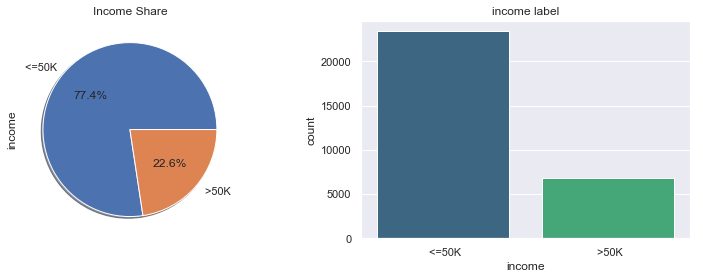

In [16]:
sns.set(font_scale=1)
f,ax=plt.subplots(1,2,figsize=(13,4))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="viridis")
ax[1].set_title("income label")

### <font color='blue'> Most of samples are HS-grad

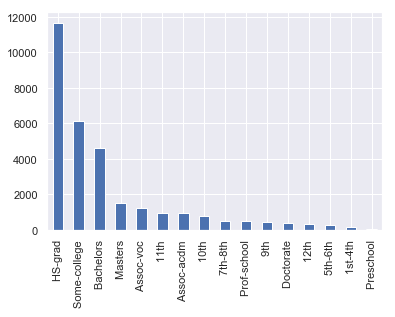

In [17]:
df['education'].value_counts().plot.bar()

### <font color='blue'> It's around 70% male and 30% female

Text(0.5, 1.0, 'Sex%')

Text(0.5, 1.0, 'Sex label')

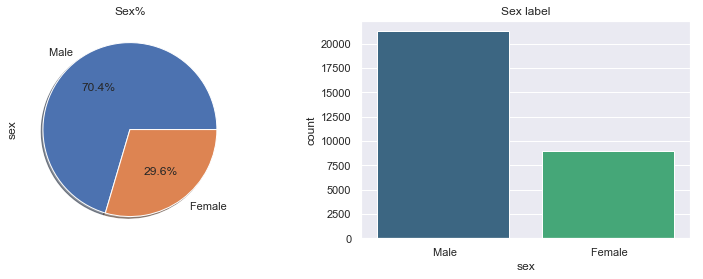

In [18]:
sns.set(font_scale=1)
f,ax=plt.subplots(1,2,figsize=(13,4))

ax[0] = df['sex'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Sex%')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="sex", data=df, palette="viridis")
ax[1].set_title("Sex label")

### <font color='blue'> The most frequent occupation is Craft-repair

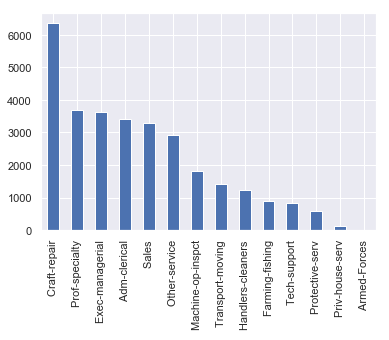

In [19]:
df['occupation'].value_counts().plot.bar()

### <font color='blue'> most the race are white

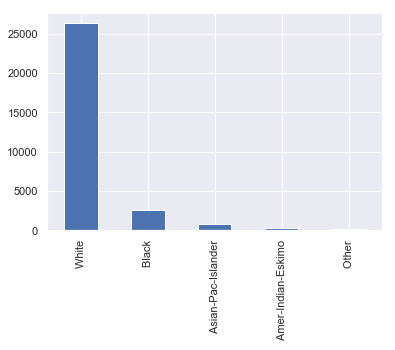

In [20]:
df['race'].value_counts().plot.bar()

### <font color='blue'> Let's see some continuous variable with our target

### <font color='blue'> The median age of people whose income >50k is higher than age 40

<Figure size 720x720 with 0 Axes>

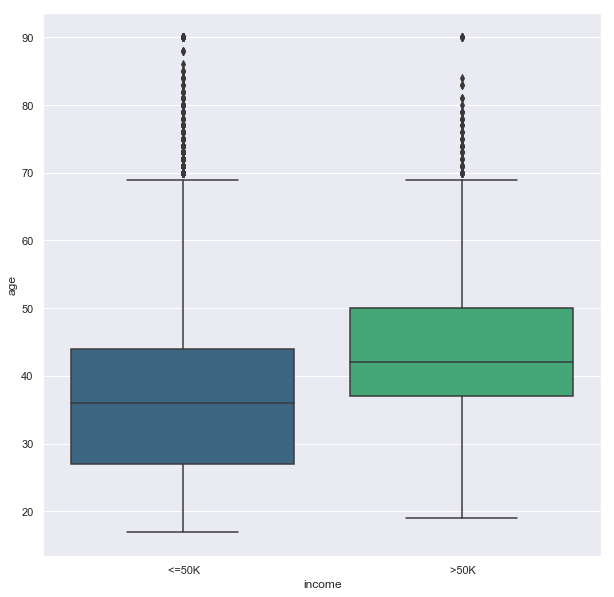

In [21]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['age'],palette='viridis')

### <font color='blue'> Most of people whose income >50k have spend more years on education

<Figure size 720x720 with 0 Axes>

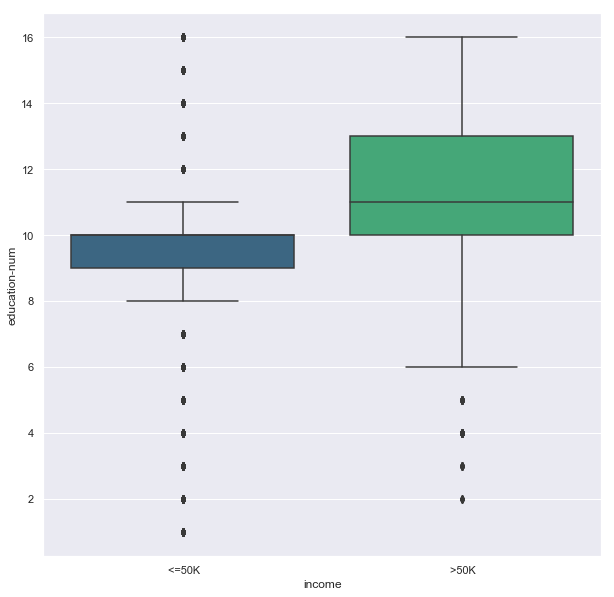

In [22]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['education-num'],palette='viridis')

### <font color='blue'> This variable is very close to zero for both label, I think this veriable is not important, maybe should drp it.

<Figure size 720x720 with 0 Axes>

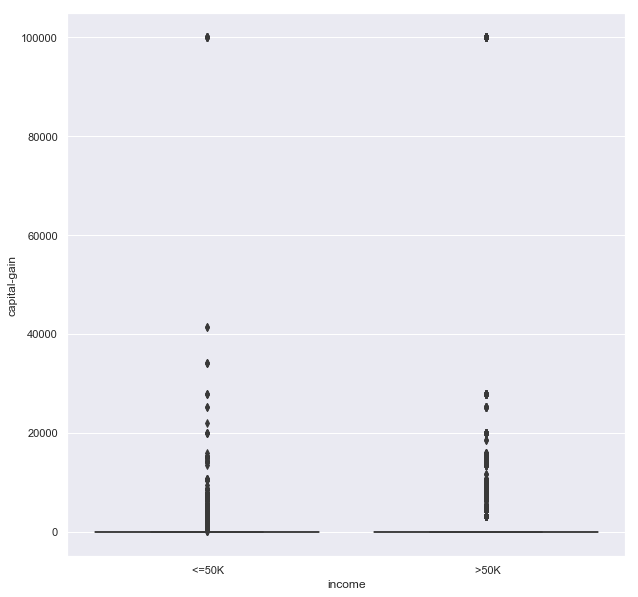

In [23]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['capital-gain'],palette='viridis')

### <font color='blue'> This variable is very close to zero for both label, I think this veriable is not important, maybe should drop it.

<Figure size 720x720 with 0 Axes>

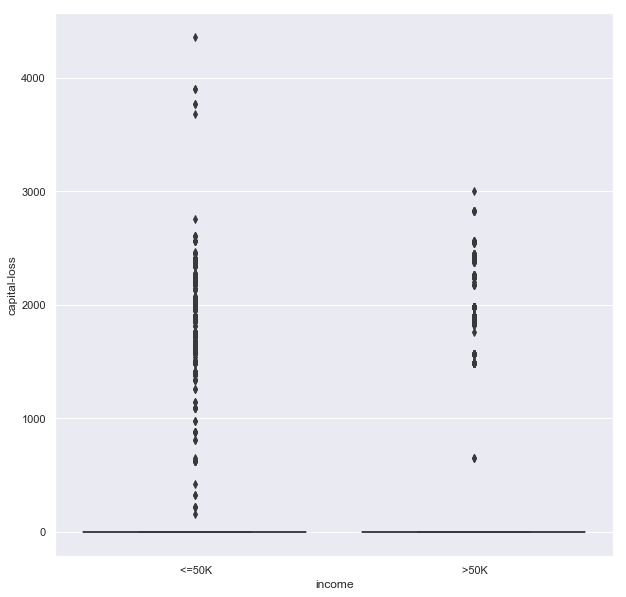

In [24]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['capital-loss'],palette='viridis')

### <font color='blue'> people whoes income >50k work more hours than people whoes <=50k.

<Figure size 720x720 with 0 Axes>

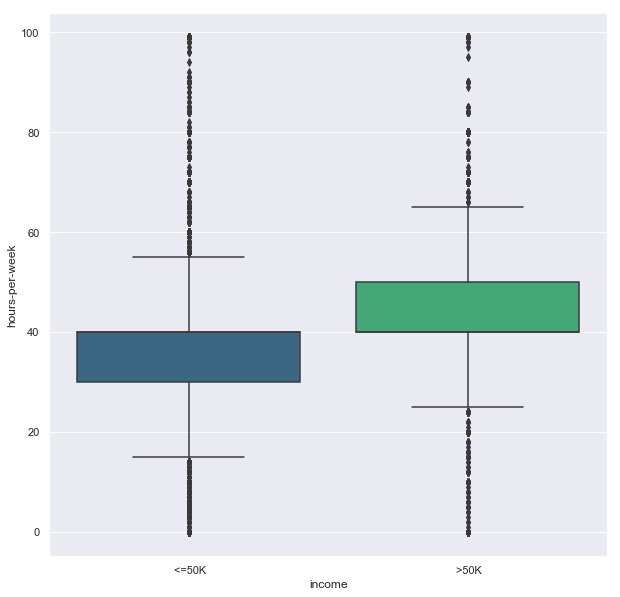

In [25]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['hours-per-week'],palette='viridis')

### <font color='blue'> Final weight is not very different between 2 labels, but the outlier of people <= 50k are higher.

<Figure size 720x720 with 0 Axes>

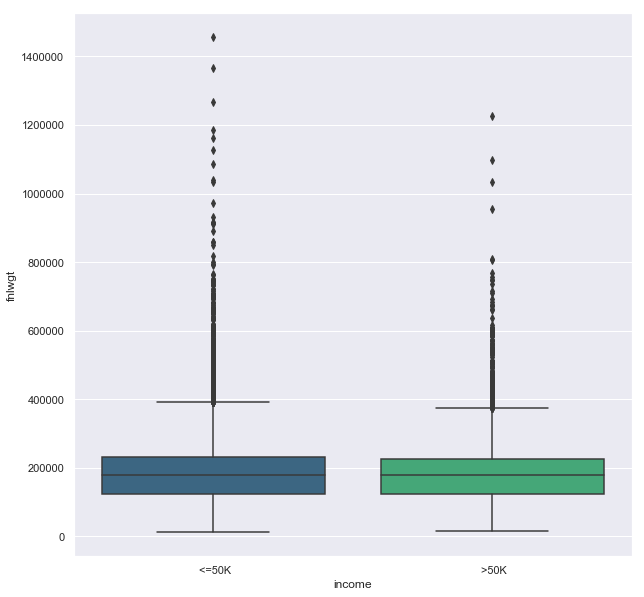

In [26]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['fnlwgt'],palette='viridis')

### <font color='blue'> We can see that only Masters, Doctorate, Prof-school have more people earn more than 50k, 
other categorical have more people whose income are lower than 50k.

<Figure size 2232x1008 with 0 Axes>

{'font.size': 20.4,
 'axes.labelsize': 20.4,
 'axes.titlesize': 20.4,
 'xtick.labelsize': 18.7,
 'ytick.labelsize': 18.7,
 'legend.fontsize': 18.7,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

Text(0.5, 1.0, 'Income with education')

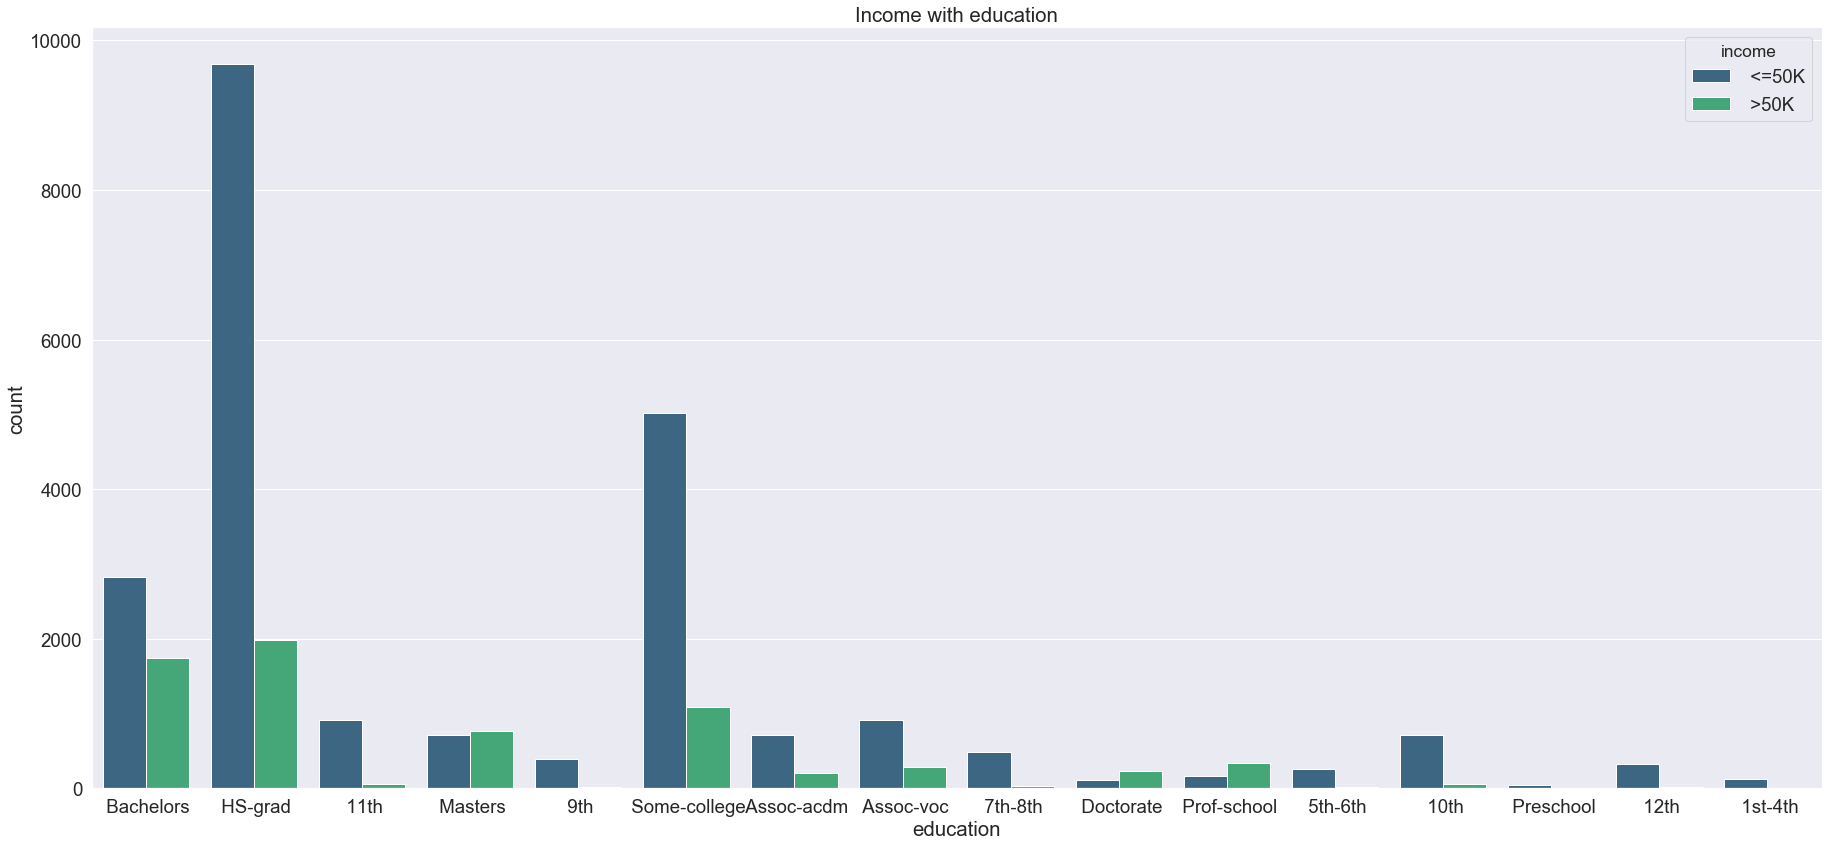

In [27]:
sns.set(font_scale=1.7)
plt.figure(figsize=(31,14))
ax = sns.countplot(x='education',hue='income', data=df, palette="viridis")
sns.plotting_context(font_scale=1.5)
ax.set_title("Income with education")

### <font color='blue'> We can see there is signigicantly more people who never-married in income <=50k label than in income >50k label.

Text(0.5, 1.0, 'Income for marital-status')

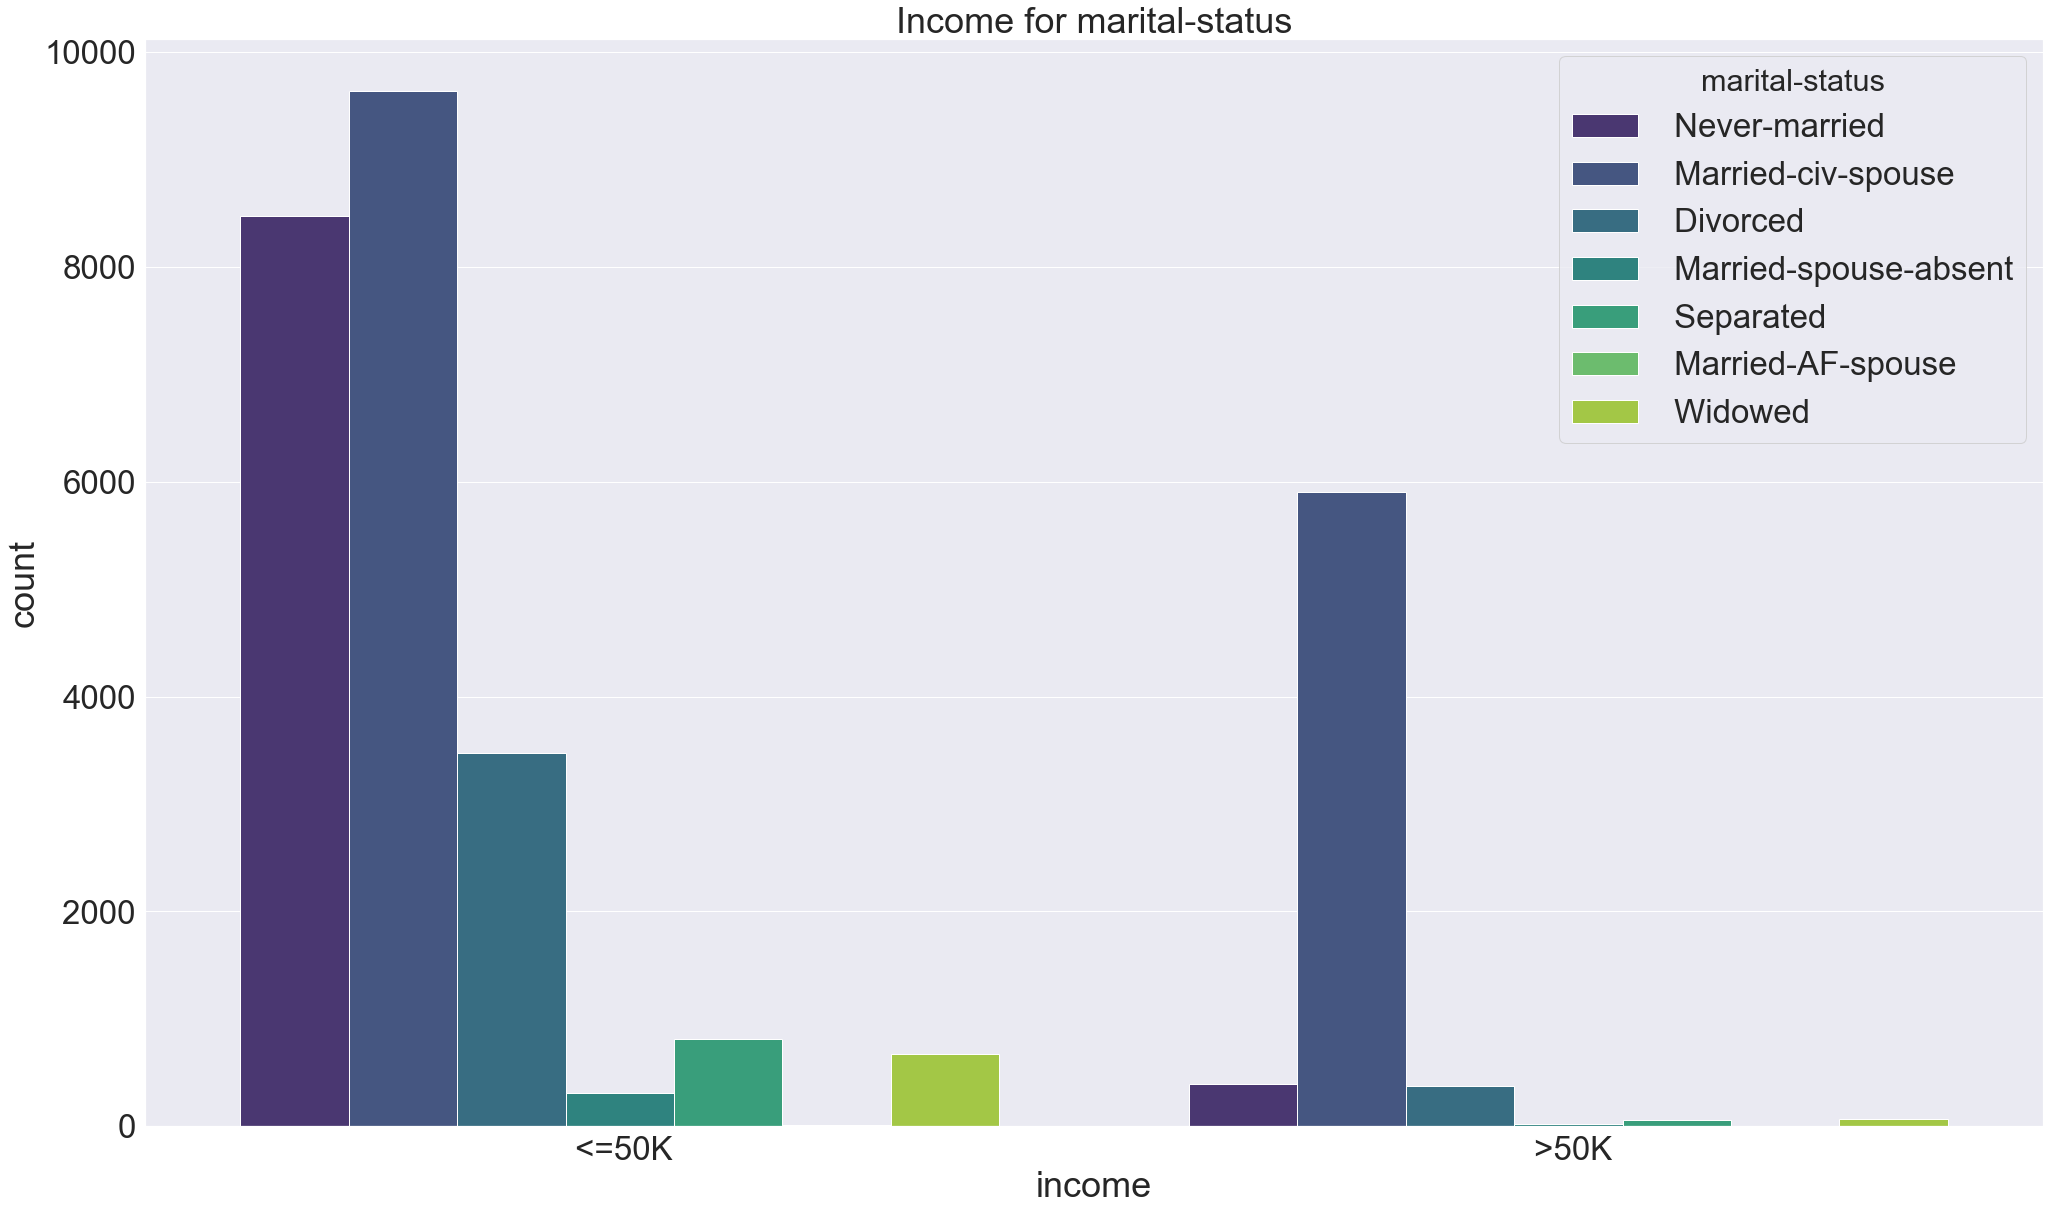

In [28]:
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(34, 20))
ax = sns.countplot(x="income", hue="marital-status", data=df, palette="viridis")
ax.set_title("Income for marital-status")

### <font color='blue'> It looks like female are more likely to have income <=50k

<Figure size 2232x1008 with 0 Axes>

{'font.size': 36.0,
 'axes.labelsize': 36.0,
 'axes.titlesize': 36.0,
 'xtick.labelsize': 33.0,
 'ytick.labelsize': 33.0,
 'legend.fontsize': 33.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

Text(0.5, 1.0, 'Income with sex')

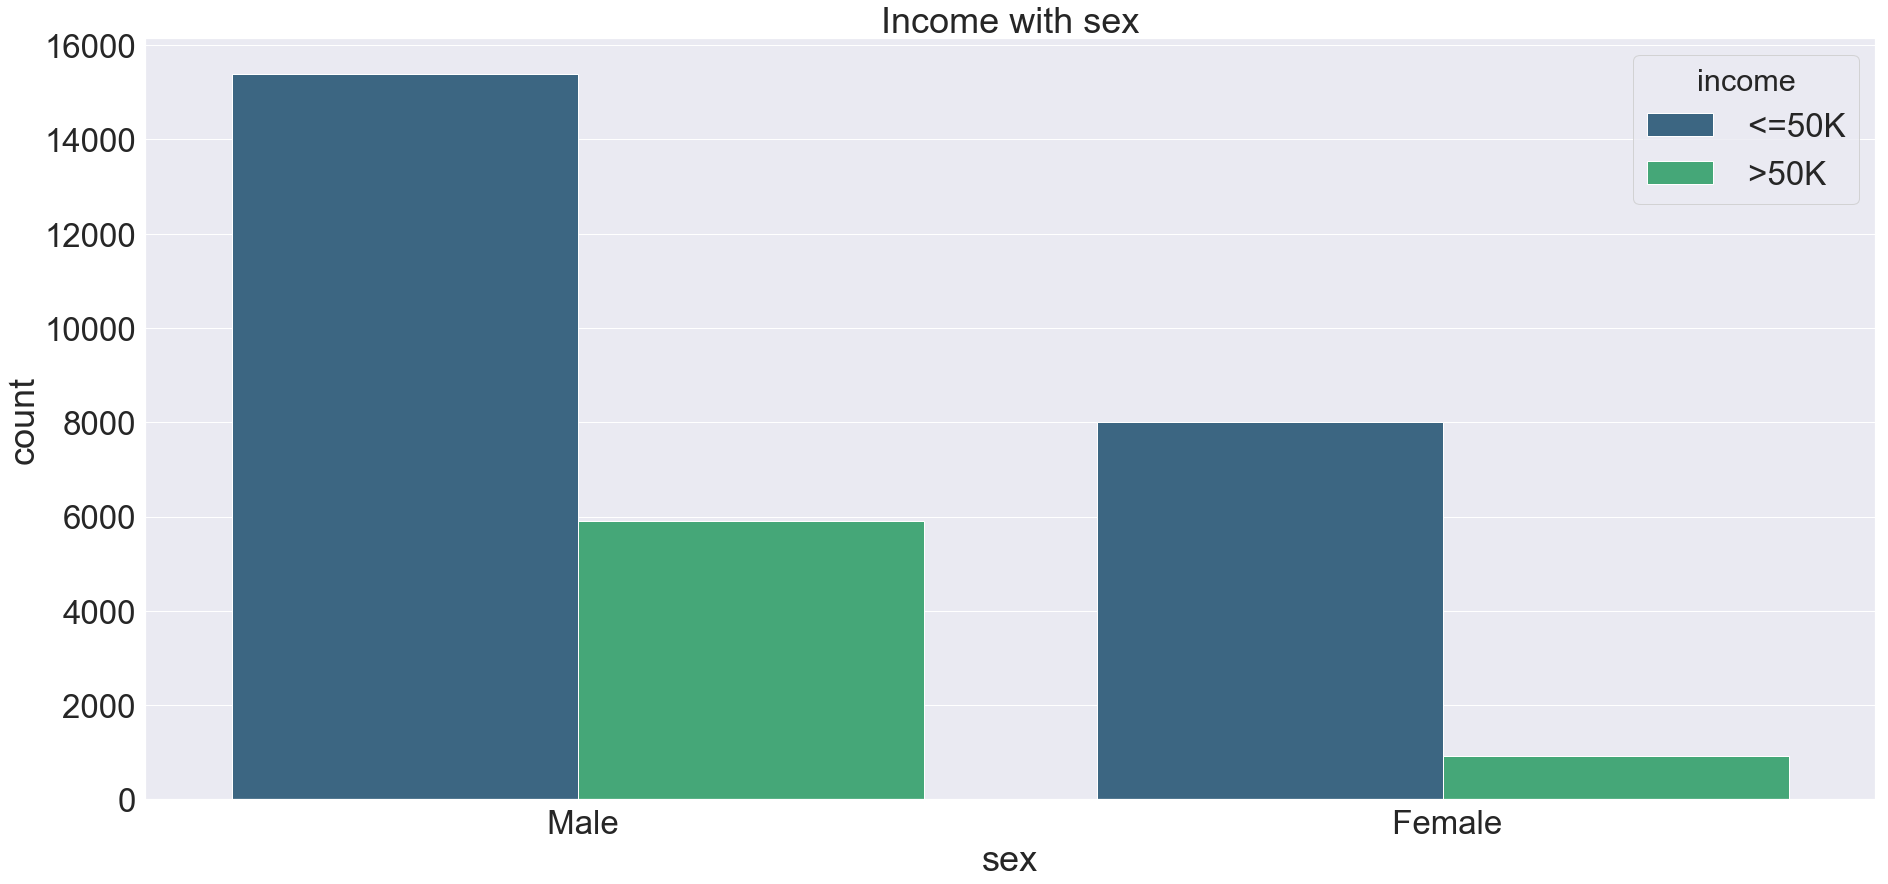

In [29]:
sns.set(font_scale=3)
plt.figure(figsize=(31,14))
ax = sns.countplot(x='sex',hue='income', data=df, palette="viridis")
sns.plotting_context(font_scale=1.5)
ax.set_title("Income with sex")

### <font color='blue'>It looks like white people are more likely to have income >50k.

<Figure size 2232x1008 with 0 Axes>

{'font.size': 36.0,
 'axes.labelsize': 36.0,
 'axes.titlesize': 36.0,
 'xtick.labelsize': 33.0,
 'ytick.labelsize': 33.0,
 'legend.fontsize': 33.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

Text(0.5, 1.0, 'Income with race')

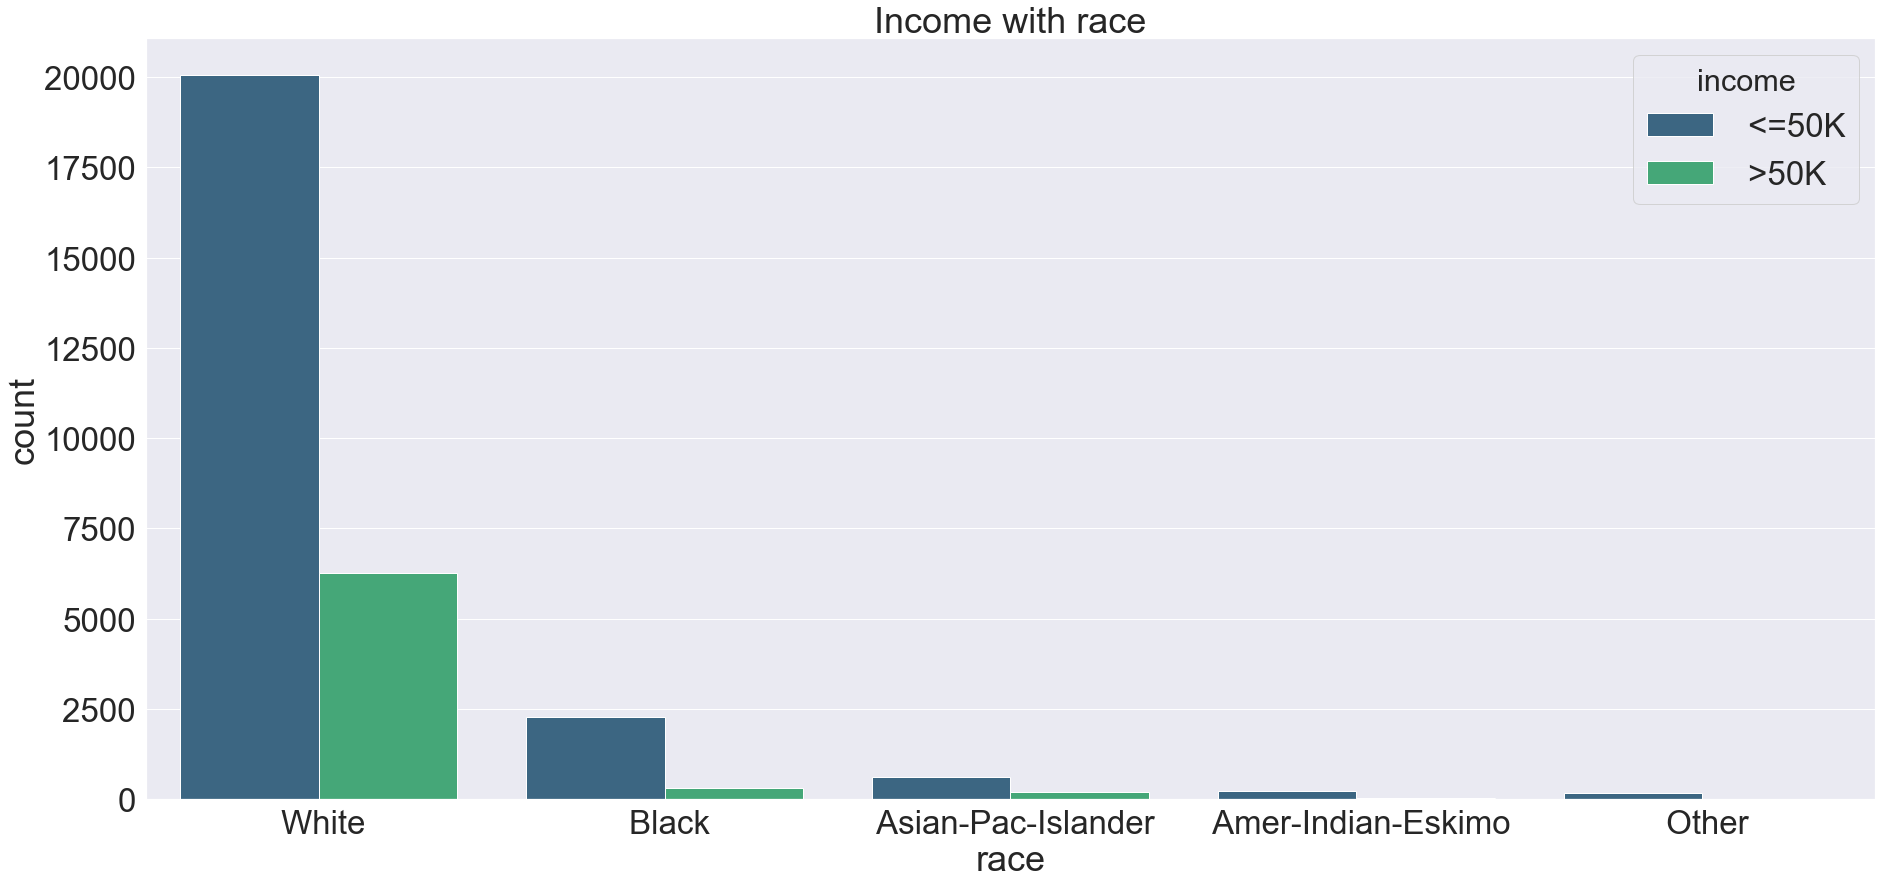

In [30]:
sns.set(font_scale=3)
plt.figure(figsize=(31,14))
ax = sns.countplot(x='race',hue='income', data=df, palette="viridis")
sns.plotting_context(font_scale=1.5)
ax.set_title("Income with race")

## Data transformation

### <font color='blue'> Transform all the categorical variable

In [31]:
# print them all to see them clearly
categorical = []
for i in df.columns:
    if df[i].dtype=='O':
        categorical.append(i)
print(categorical)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [32]:
workclass_dummy=pd.get_dummies(df['workclass'],columns='workclass',prefix='workclass') 
df=pd.concat([df, workclass_dummy], axis=1)
df.drop(['workclass'], axis=1,inplace=True)

education_dummy=pd.get_dummies(df['education'],columns='education',prefix='education') 
df=pd.concat([df, education_dummy], axis=1)
df.drop(['education'], axis=1,inplace=True)

marital_dummy=pd.get_dummies(df['marital-status'],columns='marital-status',prefix='marital-status') 
df=pd.concat([df, marital_dummy], axis=1)
df.drop(['marital-status'], axis=1,inplace=True)

occupation_dummy=pd.get_dummies(df['occupation'],columns='occupation',prefix='occupation') 
df=pd.concat([df, occupation_dummy], axis=1)
df.drop(['occupation'], axis=1,inplace=True)

relationship_dummy=pd.get_dummies(df['relationship'],columns='relationship',prefix='relationship') 
df=pd.concat([df, relationship_dummy], axis=1)
df.drop(['relationship'], axis=1,inplace=True)

race_dummy=pd.get_dummies(df['race'],columns='race',prefix='race') 
df=pd.concat([df, race_dummy], axis=1)
df.drop(['race'], axis=1,inplace=True)

country_dummy=pd.get_dummies(df['native-country'],columns='native-country',prefix='native-country') 
df=pd.concat([df, country_dummy], axis=1)
df.drop(['native-country'], axis=1,inplace=True)

df['sex'] = df['sex'].map({' Male':1, ' Female':0}).astype(int)
df['income'] = df['income'].map({' <=50K':0, ' >50K':1})

### <font color = 'blue'>Now we have 105 columns

In [33]:
df.shape

(30224, 105)

## Train_Test_Split & Scale variable

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
np.random.seed(123)
Y  = df["income"]
X =  df.drop("income",axis=1)
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0)

### <font color = 'blue'> Using standardscaler to scale the data

In [36]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train_org)
X_test = ss.transform(X_test_org)

## Voting Classifier for 5 models

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_moons
from sklearn.svm import SVC

## Hard Voting

In [38]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(10)
knn_clf.fit(X_train, y_train)
svc_lin_clf = LinearSVC(C = 0.1)
svc_lin_clf.fit(X_train, y_train)
svc_rbf_clf = SVC(kernel = "rbf", C=10, gamma = 0.01)
svc_rbf_clf.fit(X_train, y_train)
svc_poly_clf = SVC(kernel = "poly", C = 0.01, degree = 1, gamma = 10)
svc_poly_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc_lin', svc_lin_clf), ('svc_rbf', svc_rbf_clf), ('svc_poly', svc_poly_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
                                          
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svc_lin_clf, svc_rbf_clf, svc_poly_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression 0.8332451032292219


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier 0.811011116993118


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC 0.8268925357331922


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC 0.8280836421386977


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC 0.8312599258867125


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

VotingClassifier 0.8309952355743779


## Soft Voting

In [39]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(10)
knn_clf.fit(X_train, y_train)
svc_lin_clf = SVC(C = 0.1,probability = True)
svc_lin_clf.fit(X_train, y_train)
svc_rbf_clf = SVC(kernel = "rbf", C=10, gamma = 0.01, probability = True)
svc_rbf_clf.fit(X_train, y_train)
svc_poly_clf = SVC(kernel = "poly", C = 0.01, degree = 1, gamma = 10, probability = True)
svc_poly_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc_lin', svc_lin_clf), ('svc_rbf', svc_rbf_clf), ('svc_poly', svc_poly_clf)], voting='soft')
voting_clf.fit(X_train, y_train)
                                          
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svc_lin_clf, svc_rbf_clf, svc_poly_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression 0.8332451032292219


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier 0.811011116993118


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

SVC 0.821731074642668


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC 0.8280836421386977


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC 0.8312599258867125


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

VotingClassifier 0.8309952355743779


### <font color= 'blue'> Hard and soft voting are not much different

# Bagging and Pasting

## Decision Tree Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

In [41]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8344362096347274


In [42]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

Train score: 0.84
Test score: 0.83


In [43]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

0.7959237691900476


## Random Forest vs Decision Tree bagging

In [44]:
dt_clf = DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

In [45]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=16,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='random'),
       

In [46]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [47]:
np.sum(y_pred == y_pred_rf ) / len(y_pred)  # almost identical predictions

0.9540762308099524

In [48]:
rnd_clf.feature_importances_

array([6.08985447e-02, 4.57405594e-04, 1.30441370e-01, 2.19730177e-02,
       1.48141824e-01, 2.93902234e-02, 3.52872078e-02, 9.69907117e-04,
       6.24678499e-05, 0.00000000e+00, 1.04509583e-03, 3.24536161e-03,
       5.02106584e-04, 3.61170812e-05, 0.00000000e+00, 5.27559916e-04,
       1.44218538e-03, 5.81733222e-05, 2.95199740e-05, 3.02625082e-04,
       1.07269432e-03, 6.67866037e-04, 2.75220643e-05, 0.00000000e+00,
       2.89856460e-02, 5.30127853e-03, 6.29394336e-03, 1.62613102e-02,
       3.73077174e-06, 1.10821585e-02, 4.07779277e-04, 9.44822600e-03,
       0.00000000e+00, 1.54992399e-01, 1.06611606e-04, 6.01950483e-02,
       9.53651157e-04, 2.03260952e-04, 3.44993320e-04, 0.00000000e+00,
       3.52352703e-04, 3.10743984e-02, 1.97937652e-03, 1.72485718e-03,
       9.36669052e-04, 8.37162682e-03, 9.74447528e-06, 2.50511774e-02,
       7.93376155e-05, 9.78262815e-05, 7.21003272e-04, 3.58213761e-04,
       1.29301983e-01, 2.29501157e-02, 6.82612989e-04, 2.43984797e-02,
      

## Logistic Regression Bagging

In [49]:
log_clf = LogisticRegression(solver='lbfgs')
bag_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=None,
                  oob_score=True, random_state=0, ve

In [50]:
print(accuracy_score(y_test, y_pred))

0.8233192165166755


In [51]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(X_test, y_test)))

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=None,
                  oob_score=True, random_state=0, ve

Train score: 0.8322
Test score: 0.8233


## Decision Tree Pasting

In [52]:
# Pasting: bootstrap = False

dt_clf = DecisionTreeClassifier(random_state=0)
past_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

past_clf.fit(X_train, y_train)
y_pred = past_clf.predict(X_test)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

In [53]:
print(accuracy_score(y_test, y_pred))

0.8341715193223928


In [54]:
past_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(past_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(past_clf.score(X_test, y_test)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

Train score: 0.8385
Test score: 0.8342


## Logistic Pasting

In [55]:
# Pasting: bootstrap = False

log_clf = LogisticRegression(solver='lbfgs')
past_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

past_clf.fit(X_train, y_train)
y_pred = past_clf.predict(X_test)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=None,
                  oob_score=False, random_state=0, 

In [56]:
print(accuracy_score(y_test, y_pred))

0.8237162519851774


In [57]:
past_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(past_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(past_clf.score(X_test, y_test)))

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=None,
                  oob_score=False, random_state=0, 

Train score: 0.8321
Test score: 0.8237


## AdaBoost

In [58]:
# AdaBoost for Logistic Regression
from sklearn.ensemble import AdaBoostClassifier
log_clf = LogisticRegression(solver='lbfgs')
ada_log_clf = AdaBoostClassifier(log_clf, random_state=0)
ada_log_clf.fit(X_train, y_train)
y_pred = ada_log_clf.predict(X_test)
print("AdaBoost for Logistic Regression:")
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=0)

AdaBoost for Logistic Regression:
Accuracy score: 0.8232


In [59]:
# AdaBoost for Decision Tree
dtree_clf = DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=0)
ada_dtree_clf = AdaBoostClassifier(dtree_clf, random_state=0)
ada_dtree_clf.fit(X_train, y_train)
y_pred = ada_dtree_clf.predict(X_test)
print(" ")
print("AdaBoost for Decision Tree:")
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=16,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=0,
                               

 
AdaBoost for Decision Tree:
Accuracy score: 0.8396


### <font color = 'blue'> Adaboost really improve the result

## Gradient Boosting

In [60]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("Accuracy on training set: {:.4f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(X_test, y_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy score: 0.7881
Accuracy on training set: 0.7967
Accuracy on test set: 0.7881


# PCA

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

print("Explained variance ratio:",np.sum(pca.explained_variance_ratio_))
print("X_reduced shape:",X_reduced.shape)
print("n_components:",pca.n_components_)

Explained variance ratio: 0.951889660876513
X_reduced shape: (22668, 87)
n_components: 87


## Apply PCA on data and Compare your results with results in project 1

Before we compare I re-transform the data because the dataset is too big so it's too time consumming

In [62]:
y_target ="income"
X_features = [ i for i in df.columns if(i!=y_target)]

X=df[X_features]
y=df[[y_target]]

_, sample_X, _, sample_y = train_test_split(X, y, shuffle = False, test_size = 0.01)
print(sample_X.shape,sample_y.shape)


np.random.seed(123)
small_X_train, small_X_test, small_y_train, small_y_test=train_test_split(sample_X, sample_y, test_size=0.25, random_state=0)

small_X_train.shape
small_y_train.shape

small_X_test.shape
small_y_test.shape


columns_need_scale = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']
small_X_train[columns_need_scale] = ss.fit_transform(small_X_train[columns_need_scale])
small_X_test[columns_need_scale] = ss.fit_transform(small_X_test[columns_need_scale])

(303, 104) (303, 1)


(227, 104)

(227, 1)

(76, 104)

(76, 1)

## Logistic with small dataset

In [63]:
from sklearn.model_selection import GridSearchCV
log_clf = LogisticRegression(solver='lbfgs')
grid_values = {'C': [0.01,0.1,1,10,100]}
grid_logReg = GridSearchCV(log_clf, grid_values, cv = 5, scoring ='roc_auc',return_train_score= True)
grid_logReg.fit(small_X_train, small_y_train)
print('The best parameter: {}'.format(grid_logReg.best_params_))
print('The best score: {:.4f}'.format(grid_logReg.best_score_))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

The best parameter: {'C': 1}
The best score: 0.8665


(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25c2b557f60>)

([<matplotlib.axis.XTick at 0x25c2b53db70>,
 <a list of 5 Text xticklabel objects>)

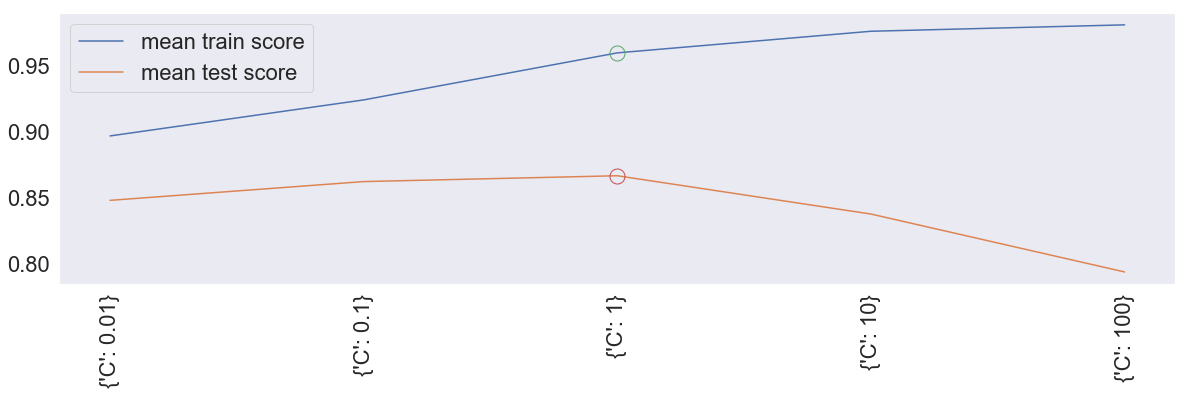

In [64]:
sns.set(font_scale=2)
result = pd.DataFrame(grid_logReg.cv_results_)
plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid_logReg.best_index_], result['mean_train_score'][grid_logReg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid_logReg.best_index_], result['mean_test_score'][grid_logReg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [65]:
Train_log_pred = grid_logReg.predict(small_X_train)
Test_log_pred = grid_logReg.predict(small_X_test)

print('Train_score: %.4f'%grid_logReg.score(small_X_train, small_y_train))
print('Test_score: %.4f'%grid_logReg.score(small_X_test, small_y_test))

from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.4f'%roc_auc_score(small_y_train, Train_log_pred))
print('Test roc_auc_score: %.4f '%roc_auc_score(small_y_test, Test_log_pred))

confusion = confusion_matrix(small_y_test, Test_log_pred)
print("Confusion matrix:\n{}".format(confusion)) #real is in row 

from sklearn.metrics import classification_report
print(classification_report(small_y_test, Test_log_pred))

Train_score: 0.9551
Test_score: 0.9080
Train roc_auc_score: 0.7690
Test roc_auc_score: 0.7143 
Confusion matrix:
[[52  4]
 [10 10]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        56
           1       0.71      0.50      0.59        20

    accuracy                           0.82        76
   macro avg       0.78      0.71      0.73        76
weighted avg       0.81      0.82      0.80        76



In [66]:
report_table =  [['LogisticRegression', grid_logReg.best_params_,
                                grid_logReg.score(small_X_train, small_y_train), 
                                grid_logReg.score(small_X_test, small_y_test),
                                roc_auc_score(small_y_train, Train_log_pred), 
                                roc_auc_score(small_y_test, Test_log_pred)]]
report_table

[['LogisticRegression',
  {'C': 1},
  0.9551314459049546,
  0.9080357142857143,
  0.7689585439838221,
  0.7142857142857143]]

## Linear SVM

In [67]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_svc_lin.fit(small_X_train, small_y_train)
print('The best parameter: {}'.format(grid_svc_lin.best_params_))
print('The best score: {:.4f}'.format(grid_svc_lin.best_score_))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

The best parameter: {'C': 0.1}
The best score: 0.8603


(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25c2b5a26a0>)

([<matplotlib.axis.XTick at 0x25c2b5b1d30>,
 <a list of 5 Text xticklabel objects>)

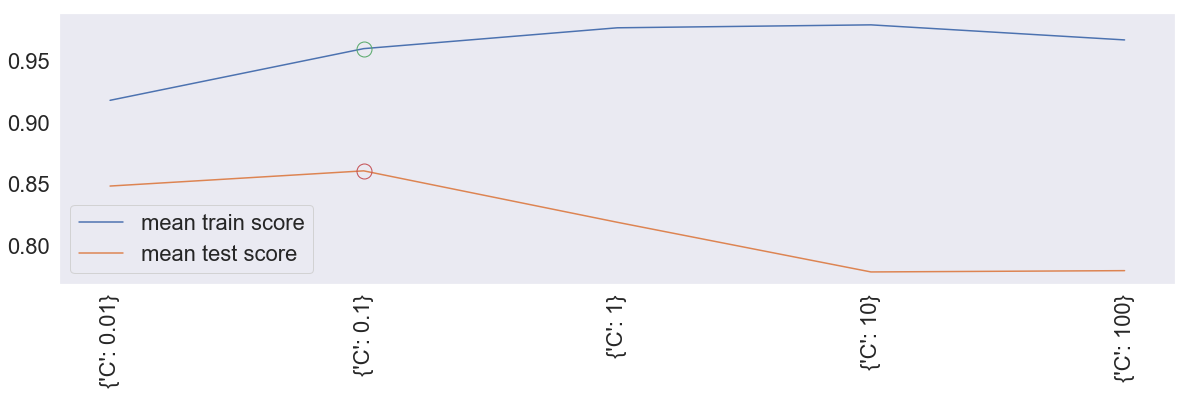

In [68]:
result = pd.DataFrame(grid_svc_lin.cv_results_)
plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid_svc_lin.best_index_], result['mean_train_score'][grid_svc_lin.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid_svc_lin.best_index_], result['mean_test_score'][grid_svc_lin.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [69]:
Train_svc_line_pred = grid_svc_lin.predict(small_X_train)
Test_svc_line_pred = grid_svc_lin.predict(small_X_test)

print('Train_score: %.4f'%grid_svc_lin.score(small_X_train, small_y_train))
print('Test_score: %.4f'%grid_svc_lin.score(small_X_test, small_y_test))

from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.4f'%roc_auc_score(small_y_train, Train_svc_line_pred))
print('Test roc_auc_score: %.4f '%roc_auc_score(small_y_test, Test_svc_line_pred))

confusion = confusion_matrix(small_y_test, Test_svc_line_pred)
print("Confusion matrix:\n{}".format(confusion)) #real is in row 

from sklearn.metrics import classification_report
print(classification_report(small_y_test, Test_svc_line_pred))

report_table = report_table + [['LinearSVC', grid_svc_lin.best_params_,
                                grid_svc_lin.score(small_X_train, small_y_train),
                                grid_svc_lin.score(small_X_test, small_y_test), 
                                roc_auc_score(small_y_train, Train_svc_line_pred), 
                                roc_auc_score(small_y_test, Test_svc_line_pred)]]

Train_score: 0.9558
Test_score: 0.9000
Train roc_auc_score: 0.7744
Test roc_auc_score: 0.7232 
Confusion matrix:
[[53  3]
 [10 10]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        56
           1       0.77      0.50      0.61        20

    accuracy                           0.83        76
   macro avg       0.81      0.72      0.75        76
weighted avg       0.82      0.83      0.82        76



In [70]:
report_table

[['LogisticRegression',
  {'C': 1},
  0.9551314459049546,
  0.9080357142857143,
  0.7689585439838221,
  0.7142857142857143],
 ['LinearSVC',
  {'C': 0.1},
  0.955763397371082,
  0.9,
  0.7743933265925177,
  0.7232142857142857]]

## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,8,12,20]}
grid_dtree = GridSearchCV(tree, tree_para,cv=5,scoring = 'roc_auc',return_train_score= True)
grid_dtree.fit(small_X_train, small_y_train)

print('The best parameter: {}'.format(grid_dtree.best_params_))
print('The best score: {:.4f}'.format(grid_dtree.best_score_))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 20]},
             pre_dispatch

The best parameter: {'criterion': 'entropy', 'max_depth': 4}
The best score: 0.7352


(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25c2b5fda58>)

([<matplotlib.axis.XTick at 0x25c2b5cb320>,
 <a list of 8 Text xticklabel objects>)

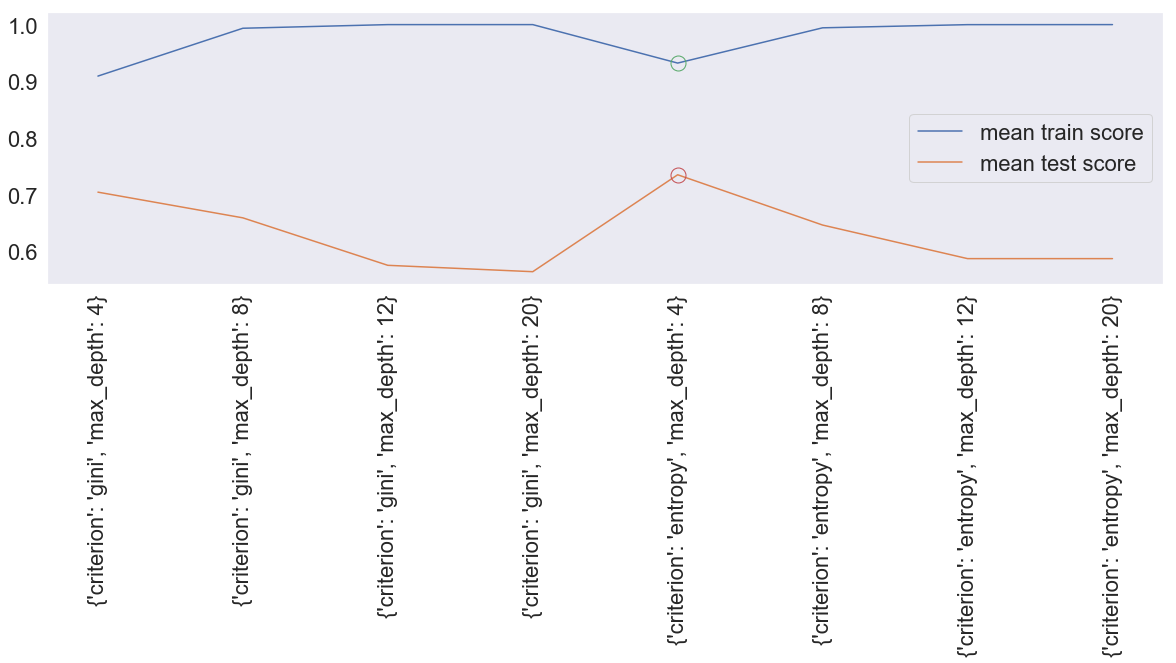

In [72]:
result = pd.DataFrame(grid_dtree.cv_results_)
plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid_dtree.best_index_], result['mean_train_score'][grid_dtree.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid_dtree.best_index_], result['mean_test_score'][grid_dtree.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [73]:
Train_tree_pred = grid_dtree.predict(small_X_train)
Test_tree_pred = grid_dtree.predict(small_X_test)

print('Train_score: %.4f'%grid_dtree.score(small_X_train, small_y_train))
print('Test_score: %.4f'%grid_dtree.score(small_X_test, small_y_test))

from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.4f'%roc_auc_score(small_y_train, Train_tree_pred))
print('Test roc_auc_score: %.4f '%roc_auc_score(small_y_test, Test_tree_pred))

confusion = confusion_matrix(small_y_test, Test_tree_pred)
print("Confusion matrix:\n{}".format(confusion)) #real is in row 

from sklearn.metrics import classification_report
print(classification_report(small_y_test, Test_tree_pred))

report_table = report_table + [['DecisionTree', grid_dtree.best_params_, 
                                grid_dtree.score(small_X_train, small_y_train), 
                                grid_dtree.score(small_X_test, small_y_test), 
                                roc_auc_score(small_y_train, Train_tree_pred), 
                                roc_auc_score(small_y_test, Test_tree_pred)]]

Train_score: 0.9376
Test_score: 0.7580
Train roc_auc_score: 0.8519
Test roc_auc_score: 0.6929 
Confusion matrix:
[[44 12]
 [ 8 12]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        56
           1       0.50      0.60      0.55        20

    accuracy                           0.74        76
   macro avg       0.67      0.69      0.68        76
weighted avg       0.76      0.74      0.74        76



In [74]:
report_table

[['LogisticRegression',
  {'C': 1},
  0.9551314459049546,
  0.9080357142857143,
  0.7689585439838221,
  0.7142857142857143],
 ['LinearSVC',
  {'C': 0.1},
  0.955763397371082,
  0.9,
  0.7743933265925177,
  0.7232142857142857],
 ['DecisionTree',
  {'criterion': 'entropy', 'max_depth': 4},
  0.9376263902932254,
  0.7580357142857144,
  0.8518705763397372,
  0.6928571428571428]]

## KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[10, 15, 20, 25]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc',return_train_score= True)
grid_knn.fit(small_X_train, small_y_train)

print('The best parameter: {}'.format(grid_knn.best_params_))
print('The best score: {:.4f}'.format(grid_knn.best_score_))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

The best parameter: {'n_neighbors': 25}
The best score: 0.8360


(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25c2bb48cc0>)

([<matplotlib.axis.XTick at 0x25c2eb22550>,
 <a list of 4 Text xticklabel objects>)

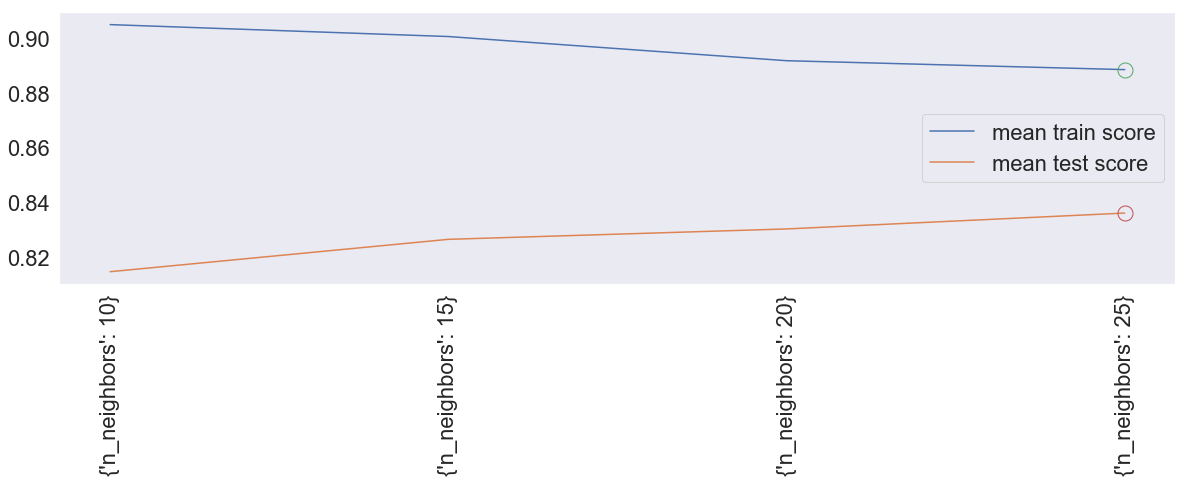

In [76]:
result = pd.DataFrame(grid_knn.cv_results_)
plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid_knn.best_index_], result['mean_train_score'][grid_knn.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid_knn.best_index_], result['mean_test_score'][grid_knn.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [77]:
Train_knn_pred = grid_knn.predict(small_X_train)
Test_knn_pred = grid_knn.predict(small_X_test)

print('Train_score: %.4f'%grid_knn.score(small_X_train, small_y_train))
print('Test_score: %.4f'%grid_knn.score(small_X_test, small_y_test))

from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.4f'%roc_auc_score(small_y_train, Train_knn_pred))
print('Test roc_auc_score: %.4f '%roc_auc_score(small_y_test, Test_knn_pred))

confusion = confusion_matrix(small_y_test, Test_knn_pred)
print("Confusion matrix:\n{}".format(confusion)) #real is in row 

from sklearn.metrics import classification_report
print(classification_report(small_y_test, Test_knn_pred))

report_table = report_table + [['knn', grid_knn.best_params_, 
                 grid_knn.score(small_X_train, small_y_train), 
                 grid_knn.score(small_X_test, small_y_test), 
                 roc_auc_score(small_y_train, Train_knn_pred), 
                 roc_auc_score(small_y_test, Test_knn_pred) ]]

Train_score: 0.8948
Test_score: 0.8549
Train roc_auc_score: 0.5616
Test roc_auc_score: 0.5411 
Confusion matrix:
[[55  1]
 [18  2]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        56
           1       0.67      0.10      0.17        20

    accuracy                           0.75        76
   macro avg       0.71      0.54      0.51        76
weighted avg       0.73      0.75      0.67        76



In [78]:
report_table

[['LogisticRegression',
  {'C': 1},
  0.9551314459049546,
  0.9080357142857143,
  0.7689585439838221,
  0.7142857142857143],
 ['LinearSVC',
  {'C': 0.1},
  0.955763397371082,
  0.9,
  0.7743933265925177,
  0.7232142857142857],
 ['DecisionTree',
  {'criterion': 'entropy', 'max_depth': 4},
  0.9376263902932254,
  0.7580357142857144,
  0.8518705763397372,
  0.6928571428571428],
 ['knn',
  {'n_neighbors': 25},
  0.8947800808897877,
  0.8549107142857143,
  0.5616152679474217,
  0.5410714285714285]]

## SVM with different kernel

In [79]:
from sklearn.svm import SVC
import numpy as np
np.random.seed(0)
parameters = {'kernel': ('rbf','poly','linear'), 'C':[0.1,1,10],'gamma': [0.1,1,10], 'degree':[1,2,3]}
svc = SVC()
svc_withkernel = GridSearchCV(svc, parameters, cv = 5, scoring = 'roc_auc',return_train_score= True)
svc_withkernel.fit(small_X_train, small_y_train)
print('The best parameter: {}'.format(svc_withkernel.best_params_))
print('The best score: {:.4f}'.format(svc_withkernel.best_score_))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 3],
                         'gamma': [0.1, 1, 10],
                         'kernel': ('rbf', 'poly', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

The best parameter: {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}
The best score: 0.8464


(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25c2eb6ebe0>)

([<matplotlib.axis.XTick at 0x25c2eb4c7b8>,
 <a list of 81 Text xticklabel objects>)

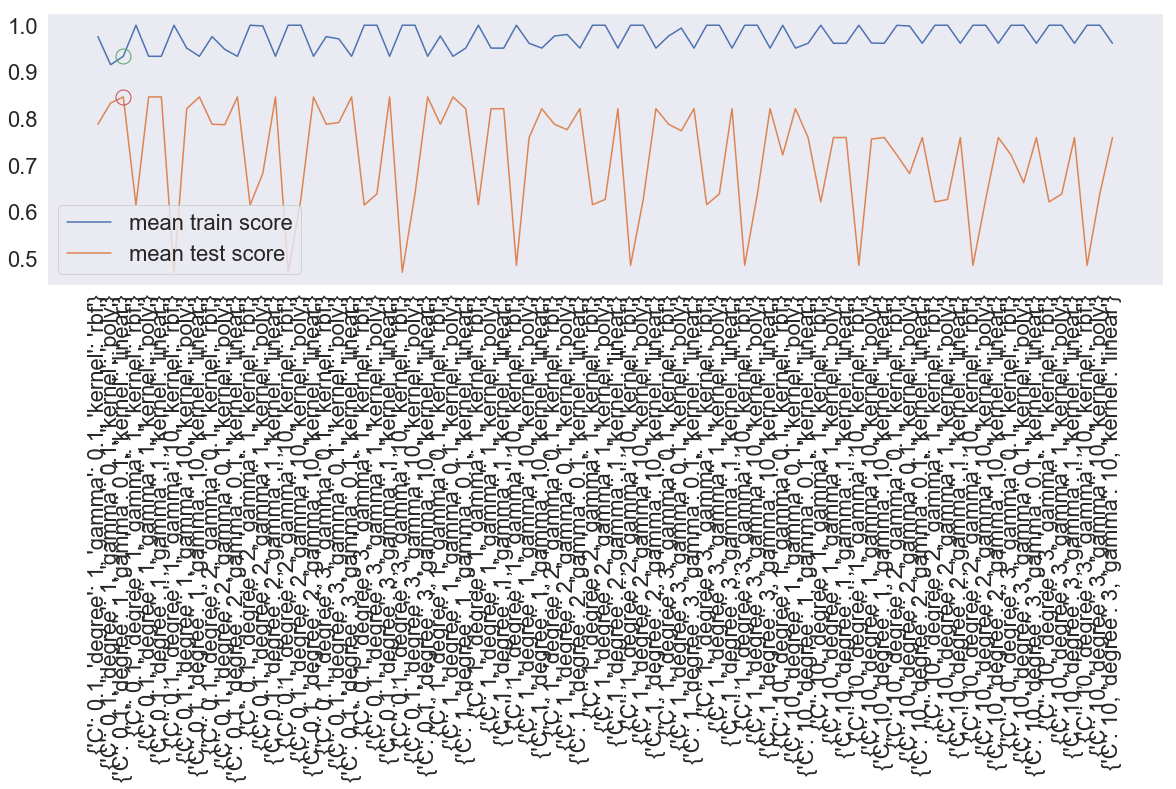

In [80]:
result = pd.DataFrame(svc_withkernel.cv_results_)
plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([svc_withkernel.best_index_], result['mean_train_score'][svc_withkernel.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svc_withkernel.best_index_], result['mean_test_score'][svc_withkernel.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [82]:
Train_svc_kernel_pred = svc_withkernel.predict(small_X_train)
Test_svc_kernel_pred = svc_withkernel.predict(small_X_test)

print('Train_score: %.4f'%svc_withkernel.score(small_X_train, small_y_train))
print('Test_score: %.4f'%svc_withkernel.score(small_X_test, small_y_test))

from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.4f'%roc_auc_score(small_y_train, Train_svc_kernel_pred))
print('Test roc_auc_score: %.4f '%roc_auc_score(small_y_test, Test_svc_kernel_pred))

confusion = confusion_matrix(small_y_test, Test_svc_kernel_pred)
print("Confusion matrix:\n{}".format(confusion)) #real is in row 

from sklearn.metrics import classification_report
print(classification_report(small_y_test, Test_svc_kernel_pred))

report_table = report_table + [['KernelizedSVM', svc_withkernel.best_params_, 
                                svc_withkernel.score(small_X_train, small_y_train), 
                                svc_withkernel.score(small_X_test, small_y_test), 
                                roc_auc_score(small_y_train, Train_svc_kernel_pred), 
                                roc_auc_score(small_y_test, Test_svc_kernel_pred)]]

Train_score: 0.9339
Test_score: 0.8759
Train roc_auc_score: 0.7128
Test roc_auc_score: 0.6643 
Confusion matrix:
[[52  4]
 [12  8]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        56
           1       0.67      0.40      0.50        20

    accuracy                           0.79        76
   macro avg       0.74      0.66      0.68        76
weighted avg       0.77      0.79      0.77        76



In [92]:
#Log
log_clf.fit(X_reduced, y_train)
Train_log_clf_pred = log_clf.predict(X_reduced)
Test_log_clf_pred = log_clf.predict(X_test_reduced)

report_table1 =  [['LogisticRegression', grid_logReg.best_params_,
                    roc_auc_score(y_train, Train_log_clf_pred),
                    roc_auc_score(y_test, Test_log_clf_pred)]]

#Linear_svc
svc_lin.fit(X_reduced, y_train)
Train_lsvm_clf_pred = svc_lin.predict(X_reduced)
Test_lsvm_clf_pred = svc_lin.predict(X_test_reduced)

report_table1 = report_table1 + [['LinearSVC', grid_svc_lin.best_params_, 
                                roc_auc_score(y_train, Train_lsvm_clf_pred),
                                roc_auc_score(y_test, Test_lsvm_clf_pred)]]

#Decision tree
dtree_clf.fit(X_reduced, y_train)
Train_dtree_clf_pred = dtree_clf.predict(X_reduced)
Test_dtree_clf_pred = dtree_clf.predict(X_test_reduced)

report_table1 = report_table1 + [['DecisionTree', grid_dtree.best_params_,  
                                roc_auc_score(y_train, Train_dtree_clf_pred),
                                roc_auc_score(y_test, Test_dtree_clf_pred)]]

#KNN
knn_clf.fit(X_reduced, y_train)
Train_knn_clf_pred = knn_clf.predict(X_reduced)
Test_knn_clf_pred = knn_clf.predict(X_test_reduced)

#print('Train_score: %.4f'%knn_clf.score(X_reduced, y_train))
#print('Test_score: %.4f'%knn_clf.score(X_test_reduced, y_test))

report_table1 = report_table1 + [['knn', grid_knn.best_params_, 
                                 roc_auc_score(y_train, Train_knn_clf_pred),
                                 roc_auc_score(y_test, Test_knn_clf_pred)]]

#KernelizedSVM (linear)
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_reduced, y_train)
Train_svm_clf_pred = svm_clf.predict(X_reduced)
Test_svm_clf_pred = svm_clf.predict(X_test_reduced)

report_table1 = report_table1 + [['KernelizedSVM', svc_withkernel.best_params_,  
                                 roc_auc_score(y_train, Train_svm_clf_pred),
                                 roc_auc_score(y_test, Test_svm_clf_pred)]]

PCA_report = pd.DataFrame(report_table1,columns = ['Model name', 'Model parameter',
                                                'PCA Train auc score','PCA Test auc score'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='random')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [93]:
PCA_report

,Model name,Model parameter,PCA Train auc score,PCA Test auc score
0,LogisticRegression,{'C': 1},0.712499,0.700353
1,LinearSVC,{'C': 0.1},0.696292,0.687032
2,DecisionTree,"{'criterion': 'entropy', 'max_depth': 4}",0.669757,0.665828
3,knn,{'n_neighbors': 25},0.714419,0.665228
4,KernelizedSVM,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'...",0.701920,0.688122


In [97]:
report_table

[['LogisticRegression',
  {'C': 1},
  0.9551314459049546,
  0.9080357142857143,
  0.7689585439838221,
  0.7142857142857143],
 ['LinearSVC',
  {'C': 0.1},
  0.955763397371082,
  0.9,
  0.7743933265925177,
  0.7232142857142857],
 ['DecisionTree',
  {'criterion': 'entropy', 'max_depth': 4},
  0.9376263902932254,
  0.7580357142857144,
  0.8518705763397372,
  0.6928571428571428],
 ['knn',
  {'n_neighbors': 25},
  0.8947800808897877,
  0.8549107142857143,
  0.5616152679474217,
  0.5410714285714285],
 ['KernelizedSVM',
  {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'},
  0.9338978766430738,
  0.8758928571428571,
  0.712778058645096,
  0.6642857142857143]]

### <font color = 'blue'> KNN and KernilizedSVM is better when under PCA, and the best SVM kernel is the same

## Deep Learning

In [105]:
# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# step 1: make the model - no hidden layer
model = Sequential()
model.add(Dense(10, input_dim = 104, activation = 'relu'))
model.add(Dense(1))

# step 2: compile the model
model.compile(loss='mse' , optimizer='sgd' , metrics = ['accuracy'])

# step 3: train the model: fit epochs and batch_size
model.fit(small_X_train, small_y_train, epochs = 20, batch_size = 200)

# step 4: evalution
loss_and_metrics = model.evaluate(small_X_test, small_y_test) #The test value accuracy

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Train on 227 samples
Epoch 1/20
227/227 [==============================] - 0s 158us/sample - loss: 0.2473 - accuracy: 0.7269
Epoch 2/20
227/227 [==============================] - 0s 22us/sample - loss: 0.2393 - accuracy: 0.7225
Epoch 3/20
227/227 [==============================] - 0s 18us/sample - loss: 0.2325 - accuracy: 0.7313
Epoch 4/20
227/227 [==============================] - 0s 22us/sample - loss: 0.2268 - accuracy: 0.7313
Epoch 5/20
227/227 [==============================] - 0s 26us/sample - loss: 0.2218 - accuracy: 0.7401
Epoch 6/20
227/227 [==============================] - 0s 26us/sample - loss: 0.2154 - accuracy: 0.7401
Epoch 7/20
227/227 [==============================] - 0s 17us/sample - loss: 0.2120 - accuracy: 0.7445
Epoch 8/20
227/227 [==============================] - 0s 18us/sample - loss: 0.2083 - accuracy: 0.7489
Epoch 9/20
227/227 [==============================] - 0s 26us/sample - loss: 0.2040 - accuracy: 0.7533
Epoch 10/20
227/227 [==============================

76/76 [==============================] - 0s 236us/sample - loss: 0.1627 - accuracy: 0.7368
Test Loss 0.1627116399376016
Test Accuracy 0.7368421


### <font color = 'blue'>Test Loss = 0.1627116399376016, Test Accuracy 0.7368421

# Conclusion
## <font color = 'green'> 1. Some models are better with PCA
## <font color = 'green'> 2. Some models are better after reducing rows
## <font color = 'green'> 3. Overall Adaboosting is really iproving the result, and it's better than gradient boosting
## <font color = 'green'> 4. Decision Tree bagging is not much different than Random Forest classifier.
## <font color = 'green'> 5. Hard and soft voting are not much different